Лабораторную работу выполнили студенты 22ПМИ1 Спасюк Мария и Родионцева Ирина

# Лабораторная работа 1. Градиентный спуск.

В этой лабораторной работе вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Лабораторная работа оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [52]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [53]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (10/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [54]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его

        return np.square(X.dot(w) - y).mean()
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        return 2 * X.T @ (X.dot(w) - y) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [55]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (10/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [56]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init
    trace = np.zeros((n_iterations + 1, w.shape[0]))
    trace[0] = w
    for t in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        trace[t + 1] = w
    return trace

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [57]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [58]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [59]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, descent_type: str):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(descent_type + " trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (10/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

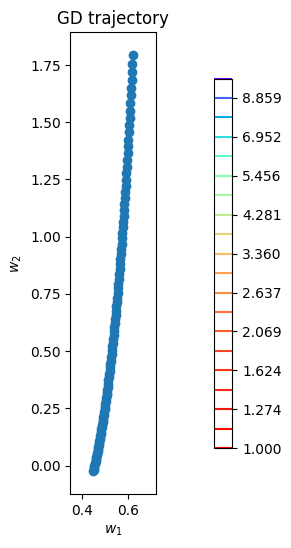

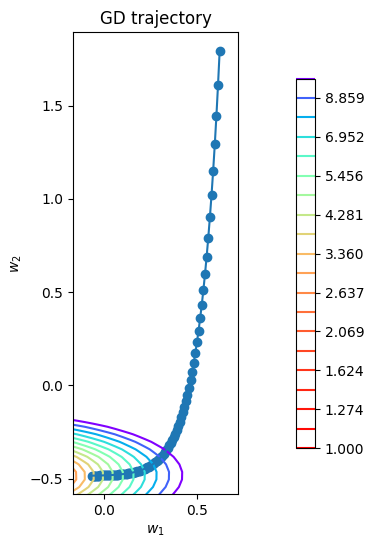

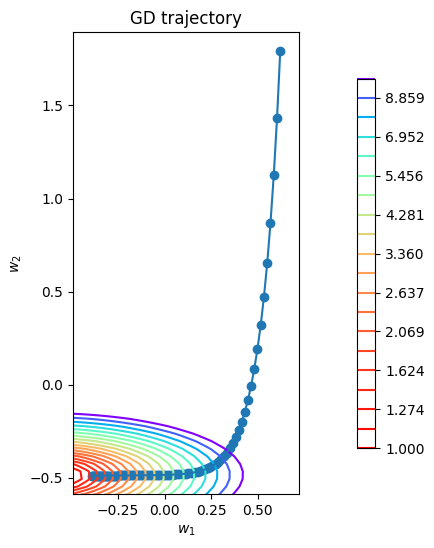

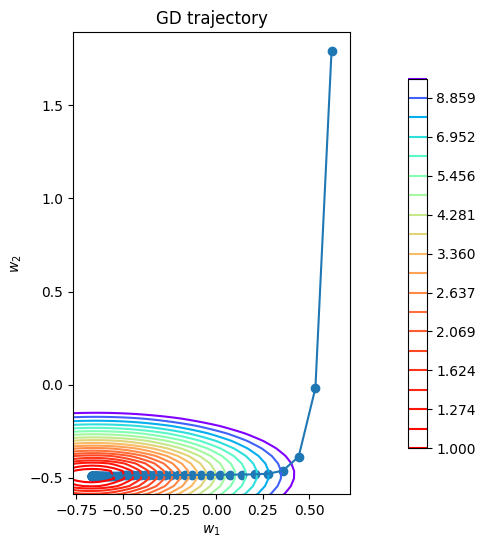

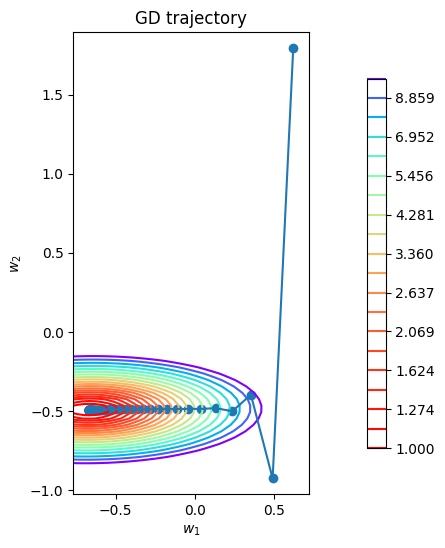

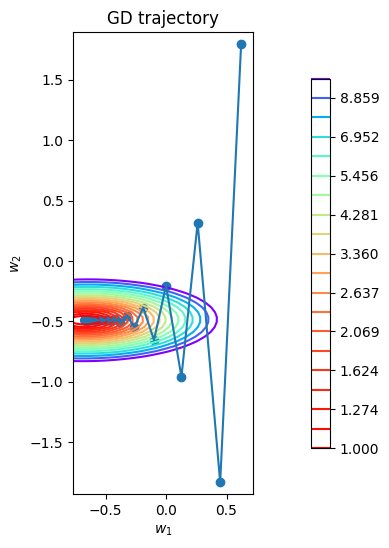

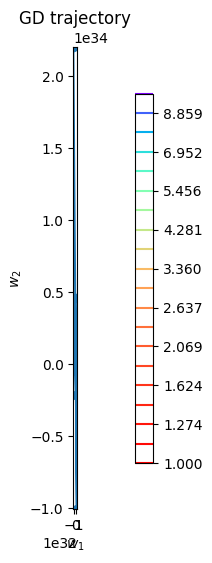

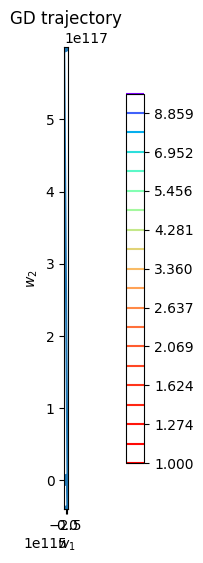

In [60]:
# -- YOUR CODE HERE --
lr = [0.0001, 0.0005, 0.001, 0.005, 0.0075, 0.01, 0.02, 0.1]
for i in range(len(lr)):
  w_list = gradient_descent(w_init, X, y, loss, lr[i], 100)
  plot_gd(w_list, X, y, loss, 'GD')

**Выводы:**
* Если сделать длину шага слишком маленькой (в нашем случае были взяты 0.0001, 0.0005 и 0.001), то процесс градиентного спуска будет проходить очень медленно, и локального минимума просто не получится достичь.
* Если сделать длину шага слишком большой (у нас таким значениям соответствуют 0.02 и 0.1), то градиентный спуск может разойтись и проскочить область убывания.
* В нашем случае хорошо подошли значения 0.005, 0.0075 и 0.01, так что можно сказать, что градиентый спуск будет эффективно работать, если брать длину шага из диапазона [0.005, 0.01].

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (10/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [61]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    batch_indices = np.random.choice(X.shape[0], size = batch_size, replace = False)
    batch_x = X[batch_indices]
    batch_y = y[batch_indices]
    w = w_init
    trace = np.zeros((n_iterations + 1, w.shape[0]))
    trace[0] = w
    for t in range(n_iterations):
        w = w - lr * loss.calc_grad(batch_x, batch_y, w)
        trace[t + 1] = w
    return trace

**Задание 1.5 (10/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

batch_size =  10
lr =  0.0001


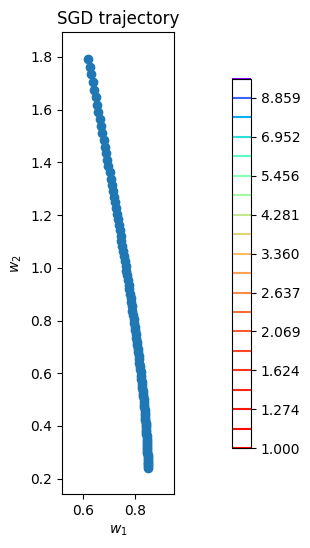

batch_size =  10
lr =  0.0005


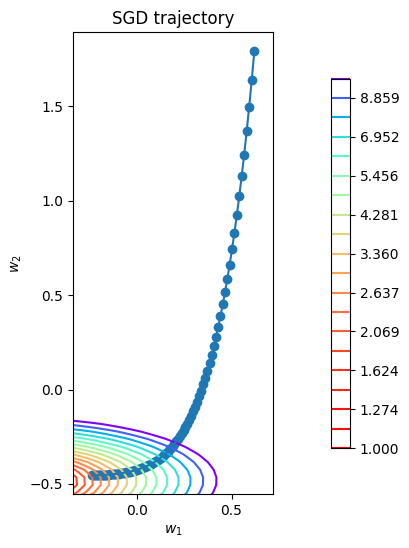

batch_size =  10
lr =  0.001


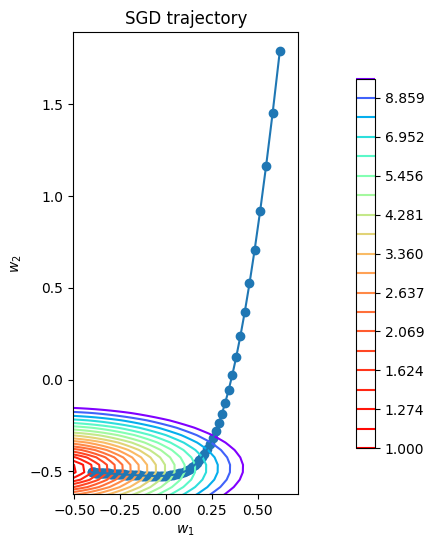

batch_size =  10
lr =  0.005


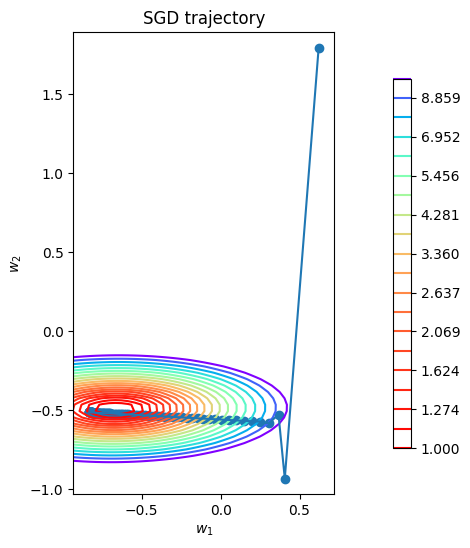

batch_size =  10
lr =  0.0075


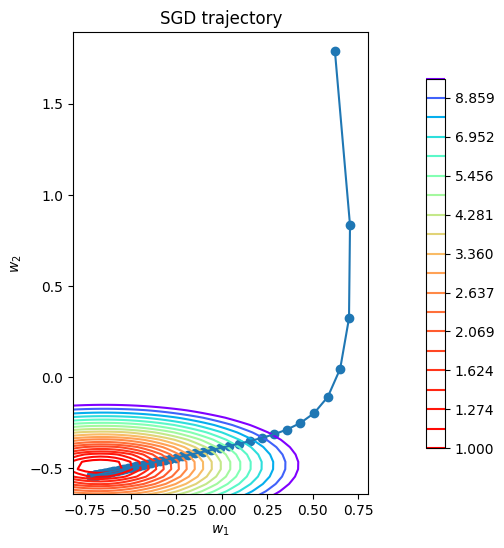

batch_size =  10
lr =  0.01


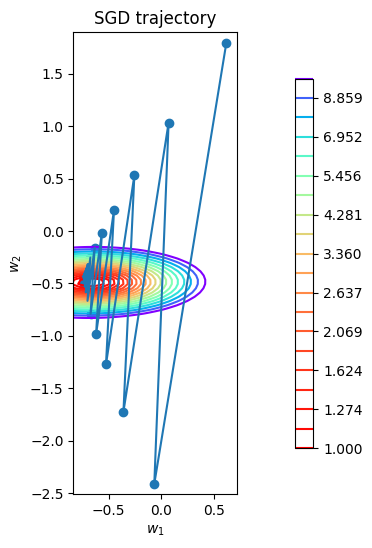

batch_size =  50
lr =  0.0001


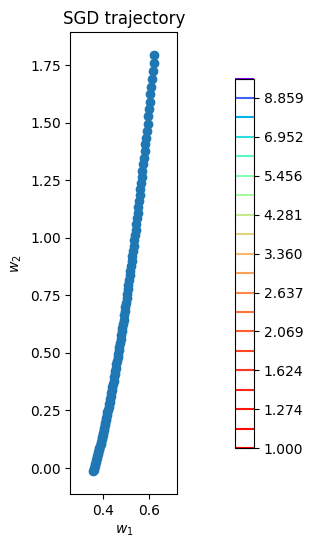

batch_size =  50
lr =  0.0005


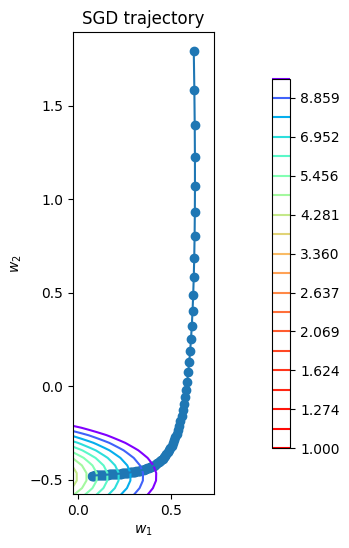

batch_size =  50
lr =  0.001


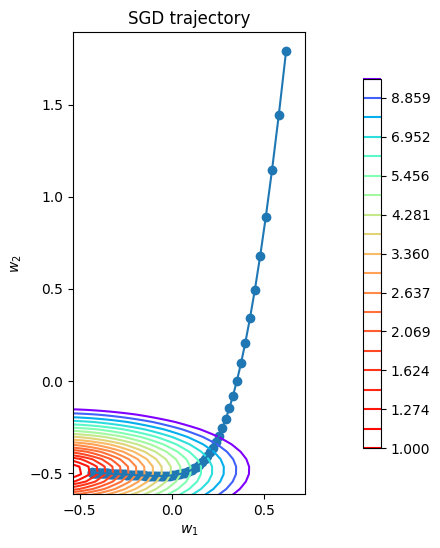

batch_size =  50
lr =  0.005


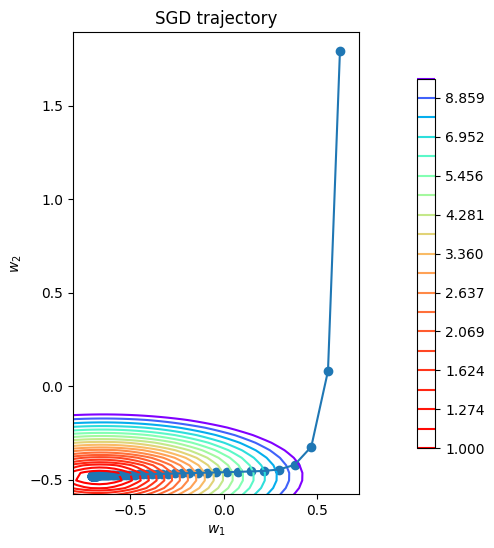

batch_size =  50
lr =  0.0075


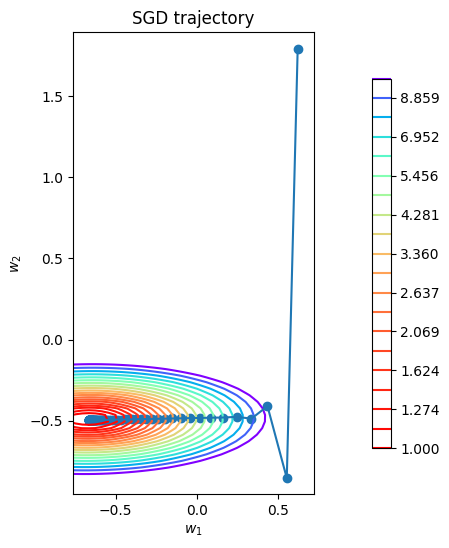

batch_size =  50
lr =  0.01


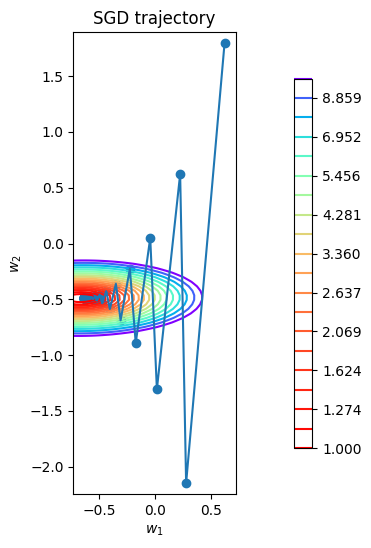

batch_size =  100
lr =  0.0001


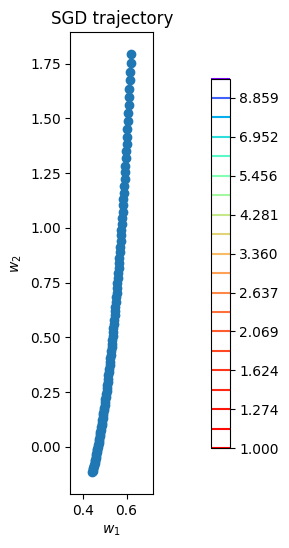

batch_size =  100
lr =  0.0005


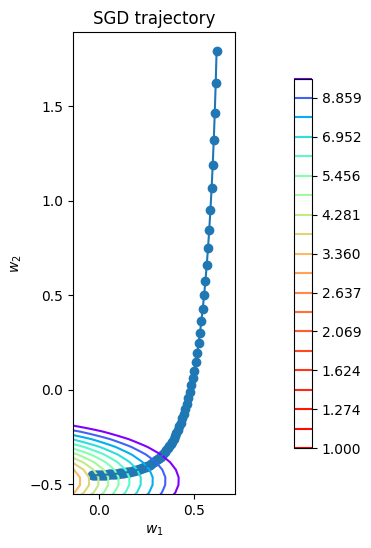

batch_size =  100
lr =  0.001


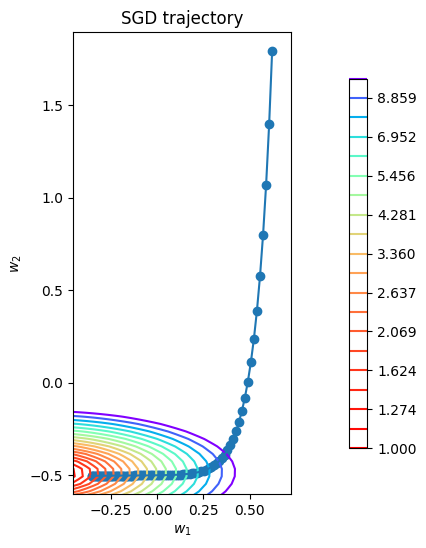

batch_size =  100
lr =  0.005


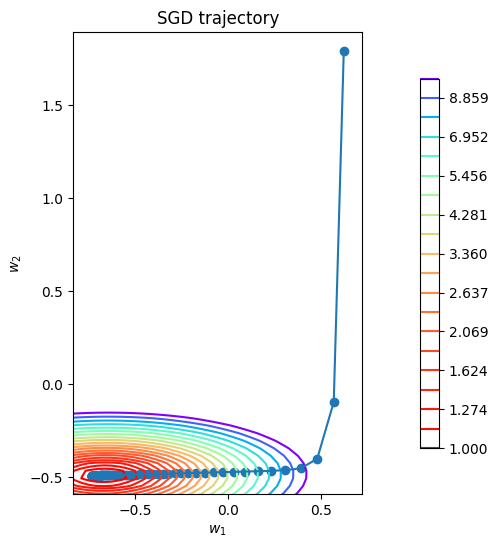

batch_size =  100
lr =  0.0075


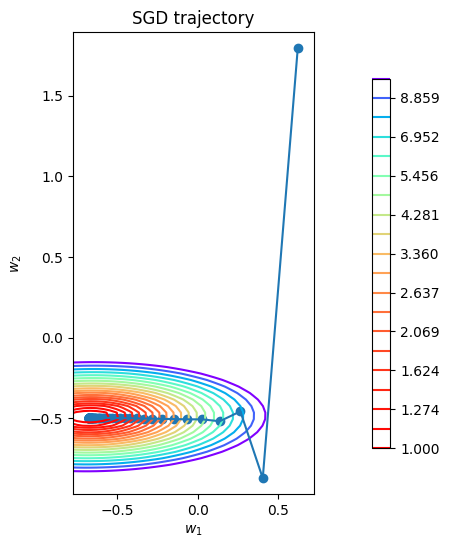

batch_size =  100
lr =  0.01


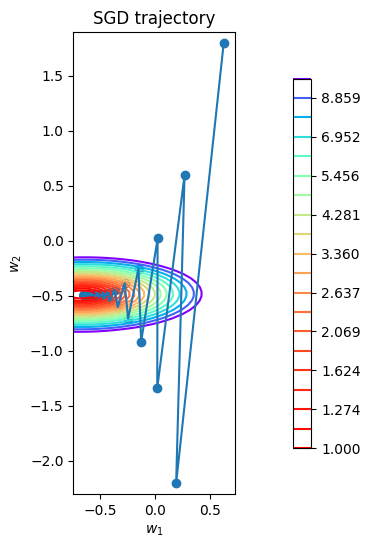

batch_size =  200
lr =  0.0001


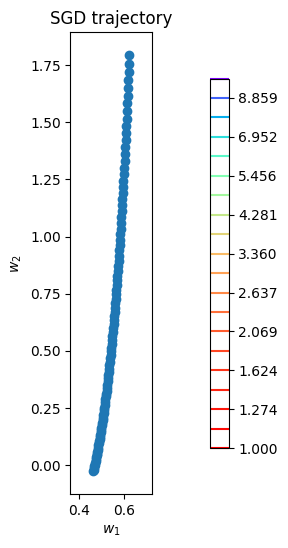

batch_size =  200
lr =  0.0005


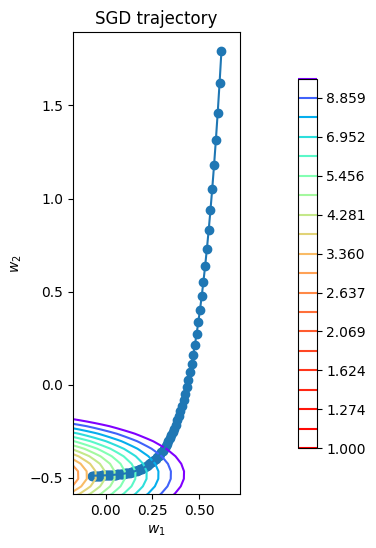

batch_size =  200
lr =  0.001


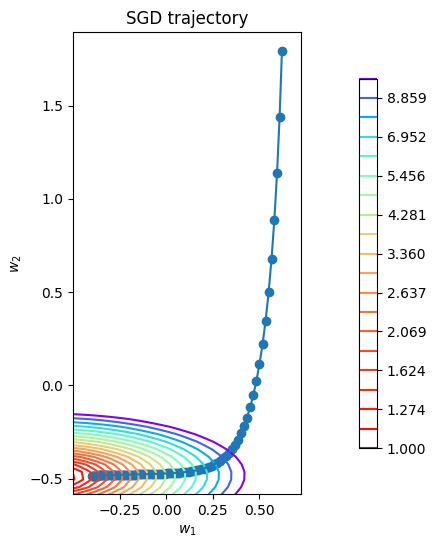

batch_size =  200
lr =  0.005


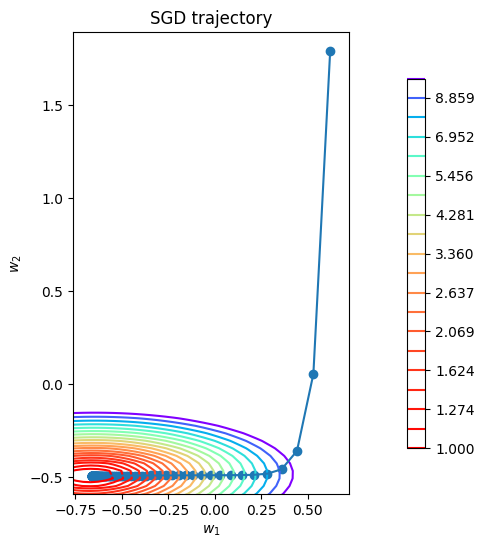

batch_size =  200
lr =  0.0075


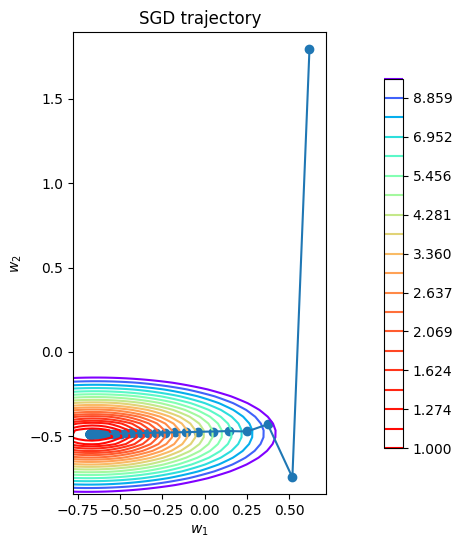

batch_size =  200
lr =  0.01


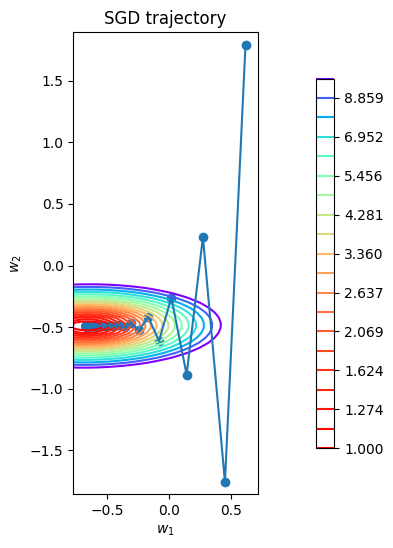

In [62]:
# -- YOUR CODE HERE --
lr = [0.0001, 0.0005, 0.001, 0.005, 0.0075, 0.01]
size = [10, 50, 100, 200]
for i in size:
    batch_size = i
    for j in lr:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, j, batch_size, 100)
        print('batch_size = ', batch_size)
        print('lr = ', j)
        plot_gd(w_list, X, y, loss, 'SGD')

Выводы:

- Как и в случае обычного градиентного спуска, при выборе очень маленькой длины шага (0.001), процесс стохастического градиентного спуска происходит очень медленно и локальный минимум просто не достигается, даже если увеличивать размер подвыборки. 
- В случае хороших значений длины шага траектория стохастического градиентного спуска становится более стабильной при увеличении размера подвыборки.
- В данном случае хорошими значениями длины шага являются числа в диапазоне от 0.005 до 0.01, что было также выяснено в случае обычного градиентного спуска.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (10/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [63]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    batch_indices = np.random.choice(X.shape[0], size = batch_size, replace = False)
    batch_x = X[batch_indices]
    batch_y = y[batch_indices]
    w = w_init
    s0 = 1
    trace = np.zeros((n_iterations + 1, w.shape[0]))
    trace[0] = w
    for t in range(n_iterations):
        nu = lr*((s0/(s0+t))**p)
        w = w - nu * loss.calc_grad(batch_x, batch_y, w)
        trace[t + 1] = w
    return trace

**Задание 1.7 (10/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p =  0.1


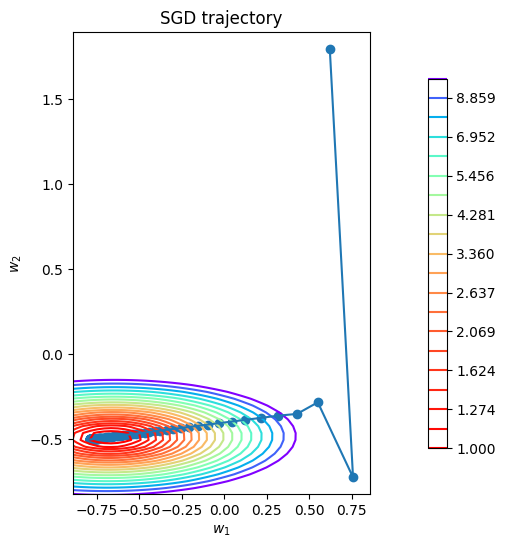

p =  0.3


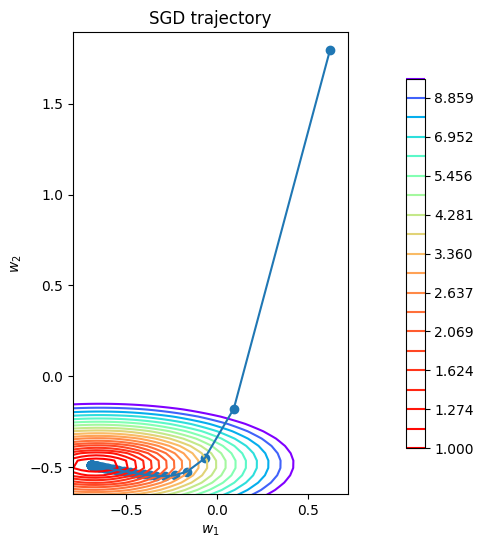

p =  0.5


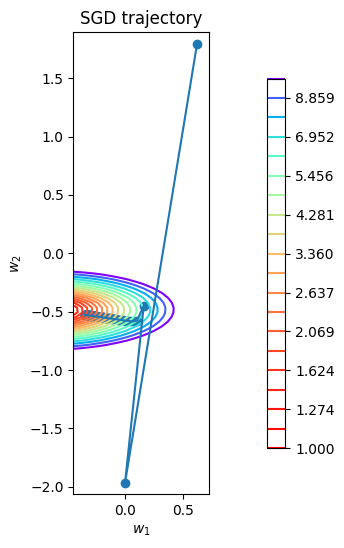

p =  0.7


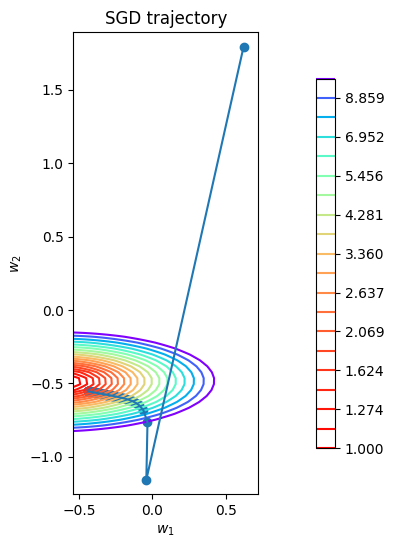

p =  0.8


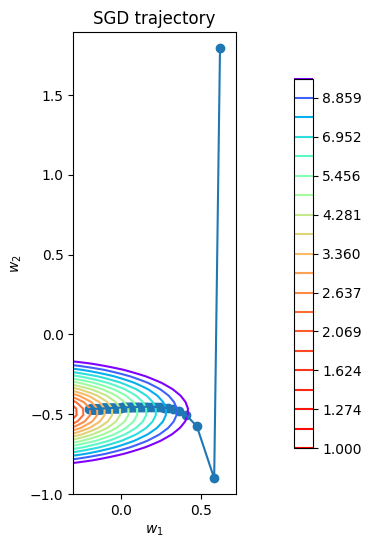

p =  1


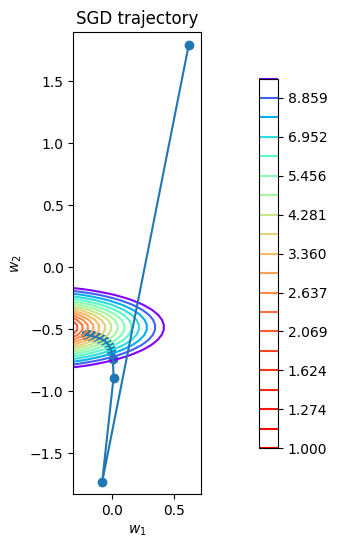

In [68]:
# -- YOUR CODE HERE --
p_values = [ 0.1, 0.3, 0.5, 0.7, 0.8, 1]
for p in p_values:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    print('p = ', p)
    plot_gd(w_list, X, y, loss, 'SGD')

Выводы:
- С увеличением значения параметра p длина шага будет уменьшаться быстрее. В этом случае при слишком больших значениях p есть шанс не дойти до локального минимума, т.к спуск затухнет существенно раньше.
- Наоборот, если значение p слишком мало, то длина шага будет уменьшаться медленнее и есть шанс перескочить докальный минимум или очень долго сходиться, так как SGD будет колебаться вокруг оптимума.
- На графиках видно, что хорошим значением параметра p в данном случае является 0.3. Оно не слишком большое, чтобы не дойти до оптимума, но и не слишком маленькое, чтобы перескочить его.

**Задание 1.8 (10/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

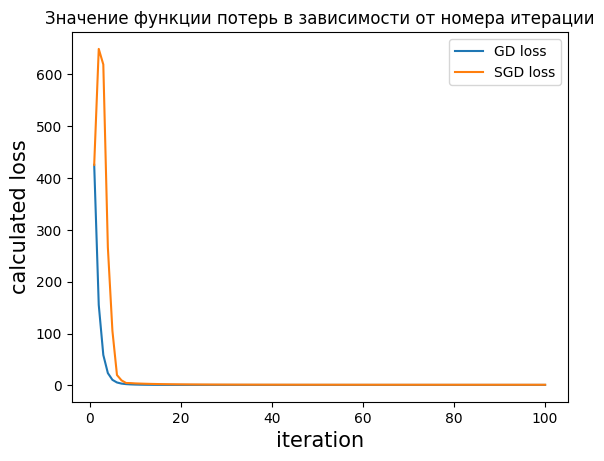

In [77]:
# -- YOUR CODE HERE --
import matplotlib.pyplot as plt
w_GD = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_SGD = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, 100)
loss_mse = MSELoss()
loss_GD = [loss_mse.calc_loss(X, y, w_GD[i]) for i in range (100)]
loss_SGD = [loss_mse.calc_loss(X, y, w_SGD[i]) for i in range (100)]
fig, ax = plt.subplots()
ax.plot(range (1,101), loss_GD, label = 'GD loss')
ax.plot(range(1,101), loss_SGD, label = 'SGD loss')
plt.xlabel('iteration', fontsize = 15, color = 'black')
plt.ylabel('calculated loss', fontsize = 15, color = 'black')
ax.legend()
plt.title('Значение функции потерь в зависимости от номера итерации')
plt.show()

Вывод:

В данном случае SGD не показывает преимуществ на графике. Стохастический градиентный спуск нестабильный на начальных итерациях, ему требуется больше шагов, чтобы оказаться вблизи локального минимума, чем требуется GD. Это происходит из-за малого размера подвыборки, в нашем случае batch_size равен 10. Если увеличить размер подвыборки, то поведение SGD станет стабильнее и может оказаться выгоднее, так как будет требоваться меньше вычислений, чем в случае GD.

**Задание 2 (0.08/8 балла)**
Вставьте ваш любимый мем в ячейку ниже:

In [66]:
# -- YOUR MEME HERE --

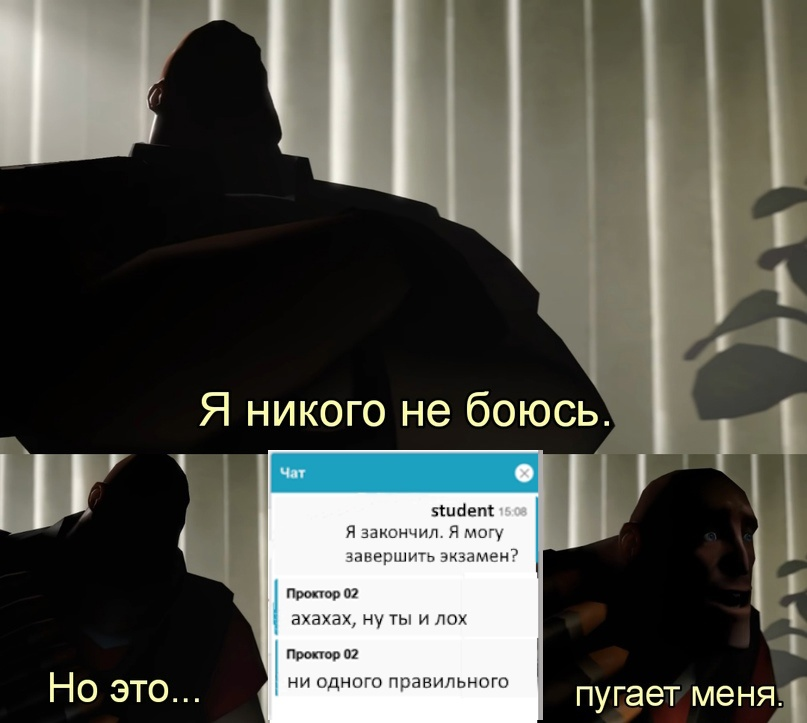